In [1]:
import torch
import time

def benchmark_throughput(model, input_size, num_iterations=100):
    # Create random input tensor
    input_tensor = torch.randn(*input_size)

    # Move model and input tensor to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    input_tensor = input_tensor.to(device)

    # Warm-up run
    with torch.no_grad():
        model(input_tensor)

    # Start benchmarking
    start_time = time.time()
    for _ in range(num_iterations):
        with torch.no_grad():
            model(input_tensor)
    end_time = time.time()

    # Calculate throughput
    elapsed_time = end_time - start_time
    throughput = num_iterations / elapsed_time

    return throughput

In [2]:
import pandas as pd
from const import (
   ANTIVAX,
   TWITTER16,
   TWITTER15,
   PHEME,
   FIGLANG_TWITTER,
   POLITIFACT,
) 



In [3]:
# dataset = TWITTER16 
# dataset = TWITTER15 
dataset = PHEME 
# dataset = FIGLANG_TWITTER
# dataset = POLITIFACT
# dataset = ANTIVAX

df = pd.read_csv(f'results/{dataset}.csv')
hs4_df = df.loc[df['model'] == 'hs4']
bert_df = df.loc[df['model'] == 'bert']
han_df = df.loc[df['model'] == 'han']
hyphen_df = df.loc[df['model'] == 'hyphen']
df =bert_df 
for i in range(0, len(df)):
   model = df.iloc[i]['model']
   manifold = df.iloc[i]['manifold']
   fourier = df.iloc[i]['fourier']
   f1 = df.iloc[i]['f1']
   prec = df.iloc[i]['prec']
   rec = df.iloc[i]['rec']
   train_time = df.iloc[i]['train time']
   print(fourier) 
   print(manifold)
   print(f'{prec:.3f} & {rec:.3f} & {f1:.3f} & {train_time:.2f}')
   print('-----------------')

True
lorentz
0.617 & 0.561 & 0.544 & 35.76
-----------------


In [4]:
import wandb
import matplotlib.pyplot as plt

# Step 1: Initialize wandb and retrieve data
api = wandb.Api()
entity, project = 'eddiechen372', dataset 
runs = api.runs(f"{entity}/{project}")


In [5]:
import torch
from const import (
   LORENTZ, 
   POINCARE, 
   EUCLID, 
   HAN, 
   HYPHEN, 
   HS4, 
   BERT,
   TWITTER16,
   TWITTER15, 
   PHEME,
   POLITIFACT,
   FIGLANG_TWITTER,
   ANTIVAX,
)
from trainer import Trainer 





/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jupyter-iec_chau/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/jupyter-iec_chau/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/jupyter-iec_chau/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree

In [6]:
import os
from const import (DATA_PATH)
import pickle
file = open(f'{DATA_PATH}/data/{dataset}/{dataset}_preprocessed.pkl', 'rb')
df = pd.read_csv(f'data/{dataset}/{dataset}.csv') 
props = pickle.load(file)

id_train, id_test = props['train']['id'], props['val']['id']
raw_c_train, raw_c_val = list(df[df['id'].isin(id_train)]['comments']), list(df[df['id'].isin(id_test)]['comments'])
raw_c_train = [c.split('::') if isinstance(c, str) else '' for c in raw_c_train]
raw_c_val= [c.split('::') if isinstance(c, str) else '' for c in raw_c_val]
x_train, x_val = props['train']['x'], props['val']['x']
y_train, y_val = props['train']['y'], props['val']['y']
c_train, c_val = props['train']['c'], props['val']['c']
sub_train, sub_val = props['train']['subgraphs'], props['val']['subgraphs']

os.environ['CUDA_VISIBLE_DEVICES'] = '1' 
hs4_trainer = Trainer(
    manifold=EUCLID,
    model_type=HS4,
    platform=TWITTER16, 
    max_sen_len=30, 
    max_com_len=30, 
    max_sents=20, 
    max_coms=20, 
    lr = 1e-3, 
    fourier = False,
    curv=1.0,
    enable_log=False,
    embedding_dim=200
)
bert_trainer = Trainer(
    manifold=POINCARE,
    model_type=BERT,
    platform=EUCLID, 
    max_sen_len=30, 
    max_com_len=30, 
    max_sents=20, 
    max_coms=20, 
    lr = 1e-3, 
    fourier = False,
    curv=1.0,
    enable_log=False,
    embedding_dim=200
)
rnn_trainer = Trainer(
    manifold=EUCLID,
    model_type=HAN,
    platform=TWITTER16, 
    max_sen_len=30, 
    max_com_len=30, 
    max_sents=20, 
    max_coms=20, 
    lr = 1e-3, 
    fourier = False,
    curv=1.0,
    enable_log=False,
    embedding_dim=200
)
# hyphen_trainer = Trainer(
#     manifold=EUCLID,
#     model_type=HYPHEN,
#     platform=TWITTER16, 
#     max_sen_len=30, 
#     max_com_len=30, 
#     max_sents=20, 
#     max_coms=20, 
#     lr = 1e-3, 
#     fourier = False,
#     curv=1.0,
#     enable_log=False,
#     embedding_dim=200
# )

# hyphen_trainer.build_model(10)


using manifold  euclid
using fourier False
using manifold  poincare
using fourier False
using manifold  euclid
using fourier False


In [7]:
rnn_trainer.build_model(32)
bert_trainer.build_model(32)
hs4_trainer.build_model(32)

saved tokenizer
Building model....
building HypPostEnc
building HypComEnc
building CoAttention
han built
saved tokenizer
Building model....
building HypPostEnc
building HypComEnc
building CoAttention
bert built
saved tokenizer
Building model....
building HypPostEnc
building HypComEnc
building CoAttention
hs4 built


In [17]:
from transformers import BertModel, RobertaModel
models = {
   'HS4': hs4_trainer.model,
   'dEFEND': rnn_trainer.model,
   'MSA': bert_trainer.model,
   # 'Hyphen': hyphen_trainer.model,
   'BERT': BertModel.from_pretrained('bert-base-uncased'),
   'RoBERTa': RobertaModel.from_pretrained('roberta-base')
   
}
for key in models.keys():
   total_params = sum(p.numel() for p in models[key].parameters())
   print(f"Total parameters of {key}: {total_params}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Total parameters of HS4: 12604460
Total parameters of dEFEND: 13188060
Total parameters of MSA: 42212061
Total parameters of BERT: 109482240
Total parameters of RoBERTa: 124645632


In [18]:
list(models.keys())

['HS4', 'dEFEND', 'MSA', 'BERT', 'RoBERTa']

  0%|          | 0/39 [00:00<?, ?it/s]

 23%|██▎       | 9/39 [00:01<00:04,  6.93it/s]


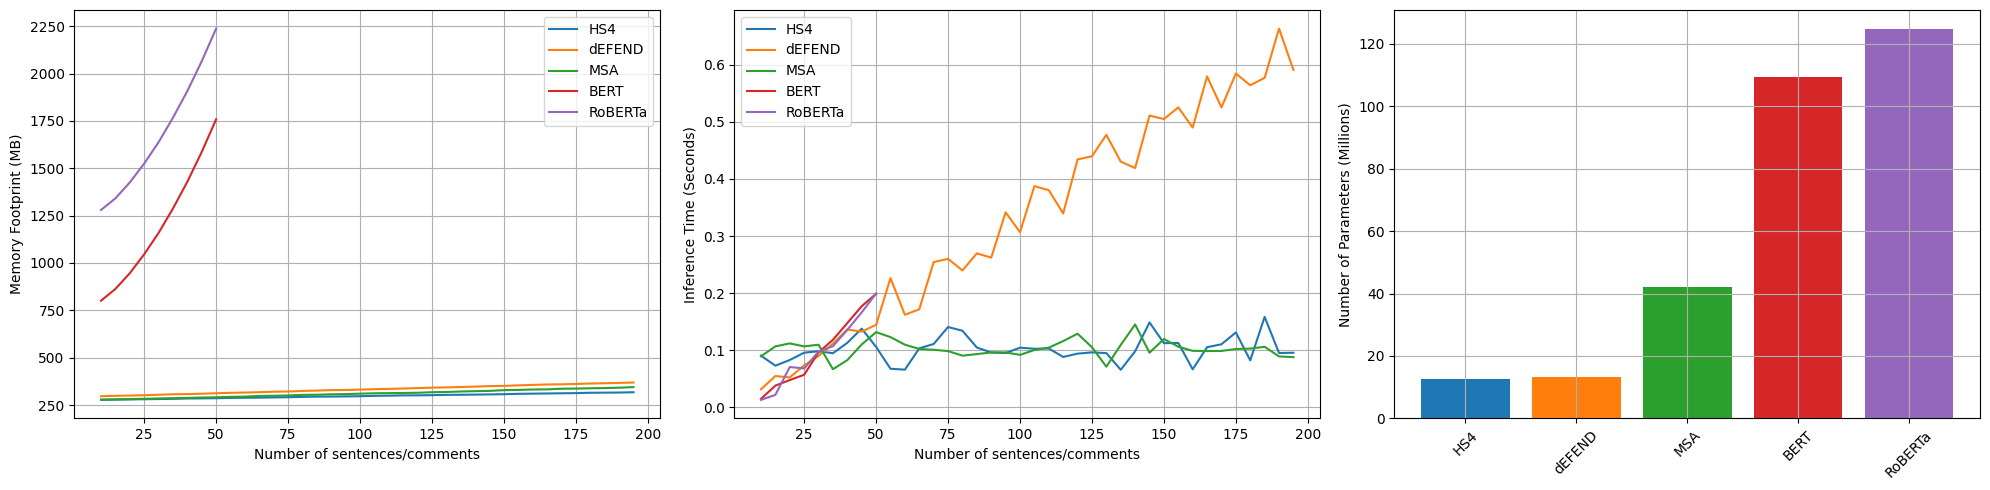

In [19]:
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm 
from scipy.signal import savgol_filter
import numpy as np

def measure_memory_footprint(model, model_type:str, comment_input_size:torch.Tensor):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device).eval()
    
    # Measure memory before inference
    torch.cuda.reset_peak_memory_stats(device)
    with torch.no_grad():
        start = time.time()
        if model_type == 'BERT' or model_type == 'RoBERTa':
            input_tensor = torch.randint(0, 100, size=(comment_input_size[0],comment_input_size[1])).to(device)
            model(input_tensor)
        else:
            input_tensor = torch.randint(0, 100, size=comment_input_size).to(device)
            model(content=input_tensor, comment=input_tensor)
        inference_time = time.time() - start 
    
    # Measure memory after inference
    memory_footprint = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # Convert to MB
    return memory_footprint, inference_time

sequence_lengths = range(5, 200, 5)

# Create a figure with two subplots (vertically arranged)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

for i, key in enumerate(list(models.keys())):
    memory_footprints = []
    inference_times = []
    no_sentence = []
    for seq_len in tqdm(sequence_lengths):
        
        if key == 'BERT' or key == 'RoBERTa':
            input_size = (32, seq_len*10)  # Example input size, adjust based on your model
        else:
            input_size = (32, seq_len, 10)  # Example input size, adjust based on your model
        footprint, inference_time = measure_memory_footprint(models[key], key, input_size)
        inference_times.append(inference_time)
        memory_footprints.append(footprint)
        no_sentence.append(seq_len)
        if no_sentence[-1] > 49 and (key == 'BERT' or key == 'RoBERTa'): break

    # Plot memory footprint on the first subplot
    ax1.plot(no_sentence[1:], memory_footprints[1:], label=f'{key}', linestyle=('-' if key != 'HS4' else '-') )
    # Plot inference time on the second subplot
    ax2.plot(no_sentence[1:], inference_times[1:], label=f'{key}', linestyle=('-' if key != 'HS4' else '-') )
    total_params = sum(p.numel() for p in models[key].parameters())/1e6
    ax3.bar(key, total_params)

# Set labels and titles for the first subplot
ax1.set_xlabel('Number of sentences/comments')

ax1.set_ylabel('Memory Footprint (MB)')
# ax1.set_title('Memory Footprint vs. Sequence Length')
ax1.grid(True)
ax1.legend()

# Set labels and titles for the second subplot
ax2.set_xlabel('Number of sentences/comments')
ax2.set_ylabel('Inference Time (Seconds)')
# ax2.set_title('Inference Time vs. Sequence Length')
ax2.grid(True)
ax2.legend()


ax3.grid(True)
ax3.set_ylabel('Number of Parameters (Millions)')
ax3.tick_params(axis='x', rotation=45) 

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

In [11]:
# from tqdm.auto import tqdm
# import seaborn as sns
# import pandas as pd

# df = pd.DataFrame()
# for run in tqdm(runs):
#    run = api.run(f"{entity}/{project}/{run.id}")
#    config = run.config
#    history = run.scan_history(keys=['best F1', 'epoch'])
#    type = config['type']
#    manifold = config['manifold']
#    for i,row in enumerate(history):
#       row = pd.DataFrame({'type': [type], 'manifold': [manifold], 'epoch': [row['epoch']], 'best F1': [row['best F1']]})
#       df = pd.concat([df, row])


# df = df[df['type'] == 'hs4']
# sns.set_theme(style="darkgrid")
# sns.lineplot(data=df, x="epoch", y="best F1", hue="manifold", style="manifold")
